<a href="https://colab.research.google.com/github/PhantomXS003/data-analysis-projects/blob/main/medical_data_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

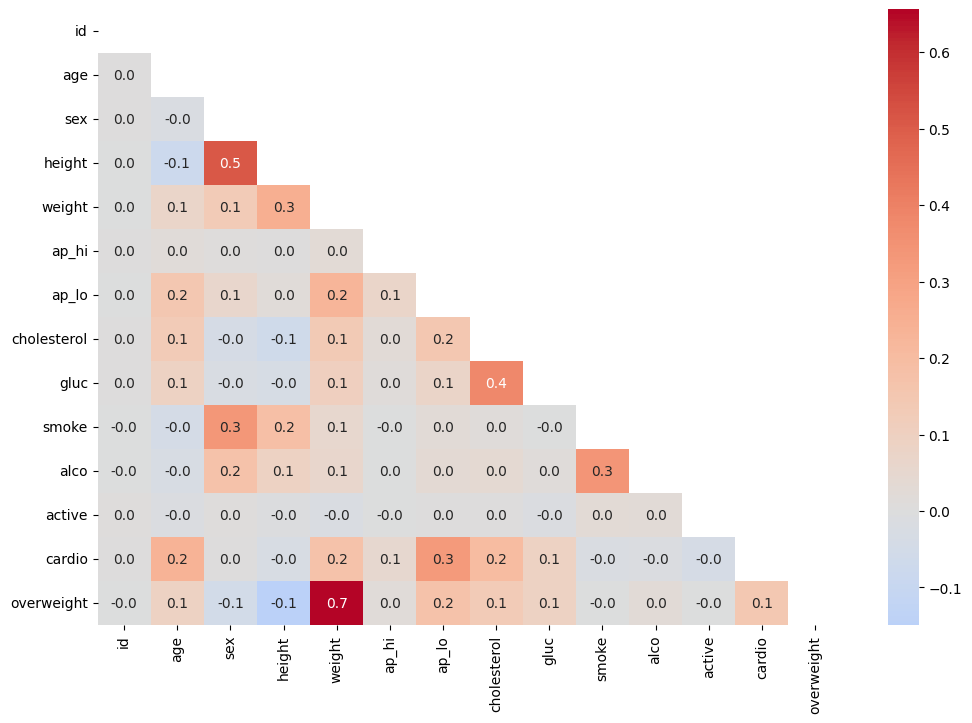

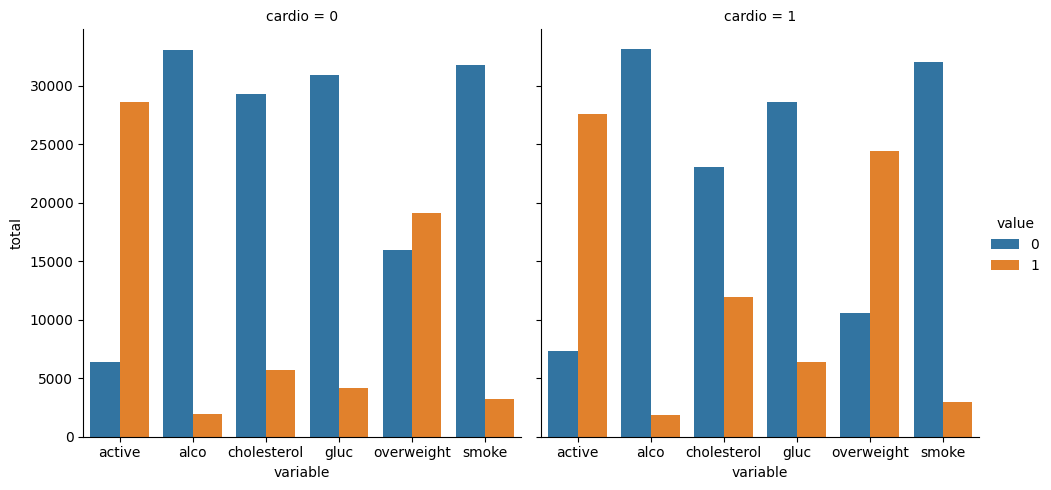

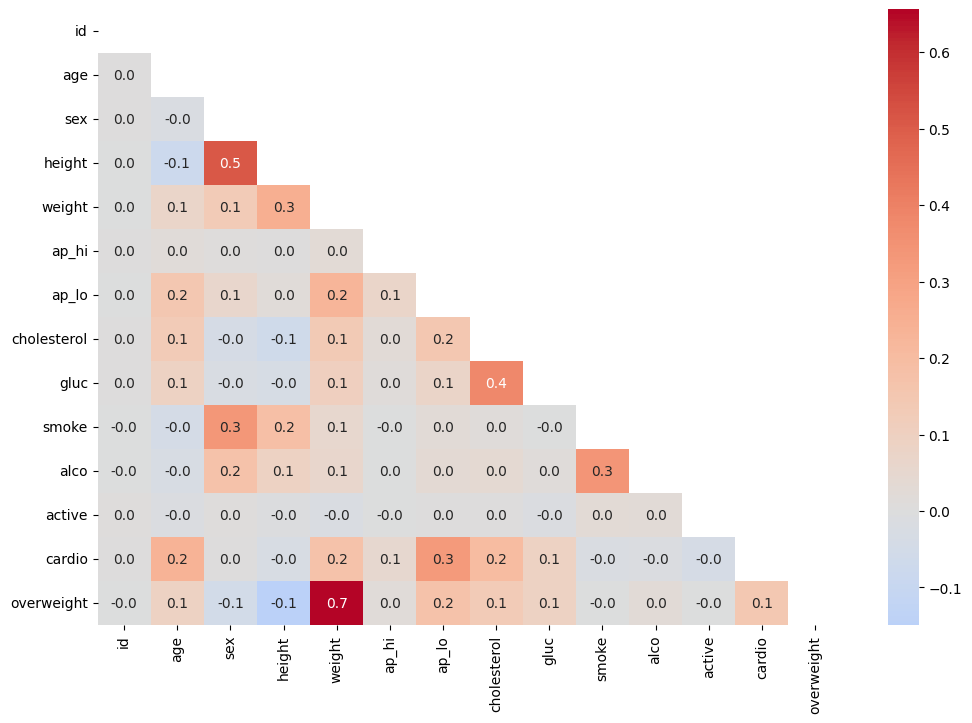

In [4]:
df = pd.read_csv("medical_examination.csv")

df['overweight'] = (df['weight'] / ((df['height'] / 100) ** 2)).apply(lambda x: 1 if x > 25 else 0)

df['cholesterol'] = df['cholesterol'].apply(lambda x: 1 if x > 1 else 0)
df['gluc'] = df['gluc'].apply(lambda x: 1 if x > 1 else 0)

def draw_cat_plot():
    df_cat = pd.melt(df, id_vars=['cardio'],
                     value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')
    fig = sns.catplot(x='variable', y='total', hue='value', col='cardio',
                      data=df_cat, kind='bar').fig
    fig.savefig('catplot.png')
    return fig

def draw_heat_map():
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]

    corr = df_heat.corr()

    mask = np.triu(np.ones_like(corr, dtype=bool))
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", center=0, cmap="coolwarm")
    fig.savefig('heatmap.png')
    return fig

draw_cat_plot()
draw_heat_map()